In [1]:
import pandas as pd
import pickle
from datetime import datetime
import geopy.distance
import matplotlib.pyplot as plt

In [2]:
import glob
all_files = glob.glob("/home/opc/extra_space/pre_processing13/*csv")
all_files

['/home/opc/extra_space/pre_processing13/new1.csv']

In [3]:
frame = pd.read_csv(all_files[0],header=0)
frame.head()

,ClientMacAddr,just_date,Level,lat,lng,just_time,len_
0,0,2018-04-01,"['L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5...","[1.2906748, 1.2906748, 1.2906748, 1.2906748, 1...","[103.851654, 103.851654, 103.851654, 103.85165...","['14:03:43', '14:03:33', '14:03:33', '14:03:43...",1
1,0,2018-04-02,"['L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5']","[1.2908567, 1.290855, 1.290855, 1.290855, 1.29...","[103.85172, 103.85172, 103.85172, 103.85172, 1...","['01:04:18', '01:14:26', '01:14:41', '01:14:26...",2
2,0,2018-04-05,"['L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5...","[1.2906915, 1.2906826, 1.2906915, 1.2906771, 1...","[103.85165, 103.85165, 103.85165, 103.85165, 1...","['23:06:40', '23:16:30', '23:03:32', '12:25:20...",10
3,0,2018-04-06,"['L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5...","[1.290692, 1.2906915, 1.2906915, 1.2906915, 1....","[103.85164, 103.85165, 103.85165, 103.85165, 1...","['00:08:38', '00:05:15', '00:04:29', '00:06:16...",2
4,0,2018-04-07,"['L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5', 'L5...","[1.2906741000000002, 1.2906741000000002, 1.290...","[103.851654, 103.851654, 103.85165, 103.85165,...","['03:44:20', '03:43:40', '03:50:44', '03:48:47...",6


In [4]:
from datetime import datetime
def validate(date_text):
    try:
        temp = datetime.strptime(date_text, "%H:%M:%S.%f")
    except ValueError:
        temp = datetime.strptime(date_text, "%H:%M:%S")
    return temp

In [5]:
counter = 0
counter2 = 0
def fn_sort(row):
    global counter
    global counter2
    counter+=1
    if counter%1000==0:
        counter2+=1
        print(counter2)
    final_list =[]
    for level,lat,lng, justime in zip(eval(row["Level"]), eval(row['lat']), eval(row['lng']),eval( row['just_time'])):
        final_list.append((level,lat,lng, justime))
        
    if len(final_list)>1:
        final_list.sort(key=lambda tup: tup[-1]) 
    return final_list

In [7]:
frame = frame.loc[frame.len_>1]

In [ ]:
%%time
temp = frame[['Level', 'lat', 'lng', 'just_time']].apply(lambda x: fn_sort(x),axis=1)

### extract time only

In [10]:
temp_list = []
for each in temp:
    temp_list.append([each_recording[-1] for each_recording in each])
        

In [12]:
def validate(date_text):
    try:
        temp = datetime.strptime(date_text, "%H:%M:%S.%f")
    except ValueError:
        temp = datetime.strptime(date_text, "%H:%M:%S")
    return temp
def calculate_diff(time1,time2):
    return (time1 - time2).total_seconds()

In [ ]:
time_list = []
for each in temp_list:
    if len(each)>=3:
        time_list.append(each)

In [ ]:
counter =0
list_ =[]
for each in time_list:
    temp = pd.DataFrame(each)
    temp.columns = ["time1"]
    temp["time2"] = temp["time1"].shift()
    temp = temp.loc[1:]
    temp["interval"] = temp.apply(lambda row: calculate_diff(validate(row["time2"]),validate(row["time1"])) , axis=1)
    list_.append(temp["interval"].mean())
    

In [ ]:
df2 = pd.DataFrame(list_)
df2 = df2.abs()

In [ ]:
df2.columns =["sec"]
df2 = df2.loc[df2.sec<=1000]

### Time interval in latitude, longitude

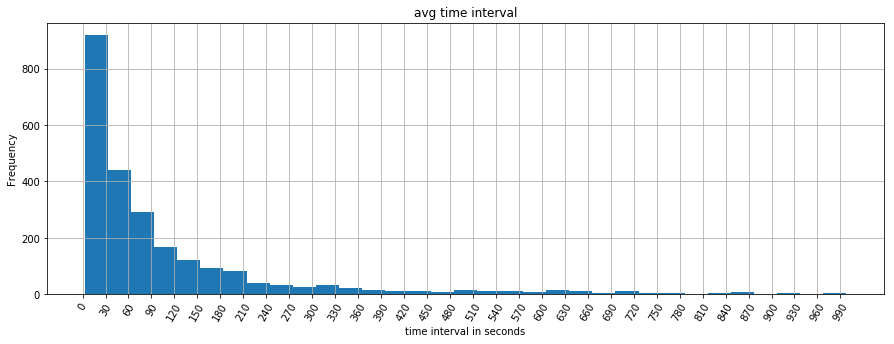

In [63]:
df2.hist(bins=33,figsize=(15,5))
plt.xlabel("time interval in seconds")
plt.ylabel("Frequency")
plt.title("avg time interval")
plt.xticks(list(range(0,1000,30)),rotation=60)
plt.show()